# 1 Data structures

## 1.a Matrix

A common approach is to represent vertices with 0s with implicit edges (left, right, down, up). 1s mean "no edge".

*Example:*

In [77]:
graph=[
    [0,1,1,0],
    [0,0,1,0],
    [1,1,0,0],
    [0,0,0,0],
]

## 1.b Adjacency matrix

In this case; M[r=i][c=j] means an edge exists from vertice *i* to vertice *j*. This structure is not that common in CS because it has a O(V<sup>2</sup>) space complexity, even though the graph has only *V* vertices.

## 1.c Adjacency list

In [78]:
class Vertice:
    def __init__(self, val):
        self.val = val
        self.neighbors = []

# 2 Matrix DFS

Question: count unique paths from top left to bottom right. Only 0s are allowed, no more than 1 visit per node for a given path.

## Architecture:

```
dfs(grid: list[list[int]], row: int, col: int, visited: set[tuple[int, int]]):

    # Base case: invalid
    if <OOB> or <Blocked> or <Visited>:
        return 0
    # Base case: invalid
    if <Reached>:
        return 1

    # Recursive call
    visit.add(row, col)
    count = 0
    count += dfs(<above|left|right|below>)
    visit.remove(row, col)
    
    return count
```

## Complexity

### Time complexity

Intuition: a path can "cover" the entire matrix, adding to `n*m` nodes. At each step of the paths, a recursive call is made to up to 4 nodes - One could argue the fourth one does not count since it is the parent node. Hence the worst-case time complexity is $O(4^{n.m})$ or $O(3^{n.m})$ depending on the analysis.

### Space complexity

A given path is composed of up to `n*m` nodes, hence the size of the recursive call stack can be $O(n.m)$ in the worst case.

In [1]:
# DFS: implementation

def dfs(grid: list[list[int]], row: int = 0, col: int = 0, visited: set[tuple[int, int]] = set()):
    R, C = len(grid), len(grid[0])
    # OOB or blocked or visited
    base_case_invalid = min(row, col) < 0\
        or row >= R or col >= C\
        or grid[row][col] == 1\
        or (row, col) in visited

    # Reached target
    base_case_valid = ((row, col) == (R - 1, C - 1))

    if base_case_invalid:
        return 0

    if base_case_valid:
        return 1
    
    # Recursive calls
    visited.add((row, col))
    
    count = 0
    count += dfs(grid, row - 1, col, visited)
    count += dfs(grid, row + 1, col, visited)
    count += dfs(grid, row, col - 1, visited)
    count += dfs(grid, row, col + 1, visited)

    visited.remove((row, col))

    return count

from numpy import array
m = array([[0]*4 for _ in range(4)])
m[1,0] = m[1, 1] = m[3, 1] = m[2, 3] = 1
m

array([[0, 0, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

In [80]:
dfs(m)

2

# 3 Matrix BFS

Question: Length of shortest path from top left to bottom right.

## Architecture:

```
bfs():
    queue, visit = deque[(0, 0)], set[(0, 0)]
    length = 1

    while queue:
        length += 1
        for _ in [1..len(queue)]:

            row, col = queue.popleft()

            if <Reached>:
                return length

            for neighbor in neighbors(row, col):
                if <OOB> or <Blocked> or <Visited>:
                    continue
                queue.append(neighbor)
                visit.add(neighbor)         
```

## Complexity

### Time complexity

Worst-case scenario, all the nodes are visited exactly once (thanks to the maintained `set`), so the time complexity is $O(n.m)$

### Space complexity

All the created objects are $O(n.m)$.


In [81]:
# BFS: implementation

from collections import deque

def bfs(grid: list[list[int]]) -> int:
    queue = deque()
    visited = set()
    R, C = len(grid), len(grid[0])

    visited.add((0, 0))
    queue.append((0, 0))
    length = -1
    while queue:
        length += 1
        for _ in range(len(queue)):
            row, col = queue.popleft()
            if (row, col) == (R - 1, C - 1):
                return length
            
            deltas = [(1, 0), (-1, 0), (0, 1), (0, -1)]
            for dr, dc in deltas:
                neighbor = (row + dr, col + dc)

                invalid_neighbor = min(*neighbor) < 0 or neighbor[0] >= R or neighbor[1] >= C \
                    or grid[neighbor] == 1 \
                    or neighbor in visited
                if invalid_neighbor:
                    continue
                
                visited.add(neighbor) # Important to do ASAP: e.g. (1, 1) is a neighbor of both (0, 1) and (1, 0), which are neighbors of (0, 0)
                queue.append(neighbor)

In [82]:
bfs(m)

6

# 4 Adjacency lists

## 4.a Graph nodes

In [83]:
class GraphNode:
    def __init__(self, val, neighbors: list = []):
        self.val = val
        self.neighbors = neighbors

## 4.b Hash maps

In [84]:
# Example
adj = {"A": ["B", "C"], "B": ["A"]}

# Build an adjacency list from a list of directed edges
edges = [["A", "B"], ["B", "C"], ["B", "E"], ["C", "E"], ["E", "D"]]

# defaultdict is not that useful here (save 1 line)
# because a vertice that is only an arrival (e.g. "C") does not get added as key
adj = {}
for src, dst in edges:
    if src not in adj:
        adj[src] = []
    if dst not in adj:
        adj[dst] = []
    adj[src].append(dst)

adj

{'A': ['B'], 'B': ['C', 'E'], 'C': ['E'], 'E': ['D'], 'D': []}

## 4.c Traversal algorithms

In [85]:
# DFS

def dfs(adj: dict[str: list[str]], src: str, dst: str, visited: set[str] = set()) -> int:

    if src == dst:
        return 1
    
    if src in visited:
        return 0
    
    count = 0
    visited.add(src)
    for neighbor in adj[src]:
        count += dfs(adj, neighbor, dst, visited)
    visited.remove(src)
    return count

In [86]:
dfs(adj, "A", "E")

2

In [87]:
# BFS
from collections import deque
def bfs(adj: dict[str: list[str]], src: str, dst: str) -> int:
    queue = deque()
    visited = set()

    queue.append(src)
    visited.add(src)
    length = -1

    while queue:
        length += 1
        for _ in range(len(queue)):
            current = queue.popleft()
            if current == dst:
                return length
            for neighbor in adj[current]:
                if neighbor not in visited:
                    queue.append(neighbor)
                    visited.add(neighbor)
    return -1


In [88]:
bfs(adj, "A", "E")

2

# 5 Shortest path algorithms

Context: Directed (or undirected, considering each edge to be bidirectional) weighted graphs.

## 5.a Dijkstra

Implementation: heapq does not support updating priority queue keys, so instead the same node can be pushed several times, with different keys. It is only marked as visited when it is popped from the queue for the first time (and in such a case, the key is guaranteed to be minimal).

*Negative weights*: Do not use Dijkstra if any edge has a negative weight, as the algorithm can fail in such a case. Since it is greedy, it cannot anticipate the fact that an expensive edge might be worth taking if the path contains negative weights later on.

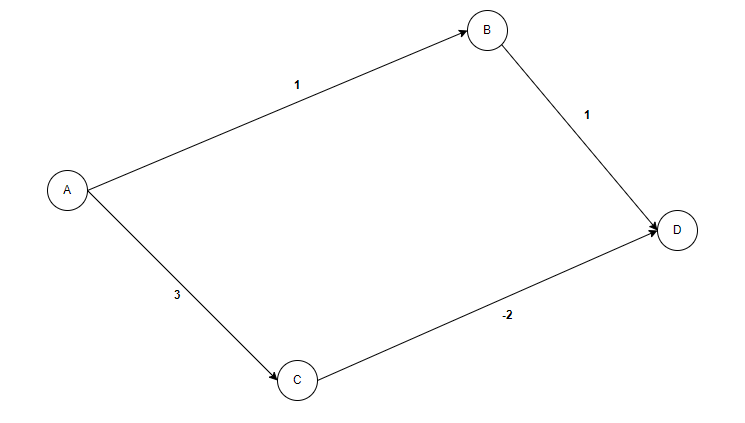

In [89]:
import heapq

def dijkstra_with_set(n, edges: list[tuple[str, str, int]], src: str) -> dict[str: int]:
  # Convert edges to adjacency list
  adj_list = {v: [] for v in range(n)}
  for v, neighbor, distance in edges:
     adj_list[v].append((neighbor, distance))
  # Dijkstra
  visited, shortest = set(), {v: float("inf") for v in adj_list}
  heap = [(0, src)]
  while heap:
      src_to_v, v = heapq.heappop(heap)
      if v in visited:
          continue
      visited.add(v)
      shortest[v] = src_to_v
      for neighbor, v_to_neighbor in adj_list[v]:
          # if neighbor not in visited: # Optional, this can just reduce the size of the heap 
          heapq.heappush(heap, (src_to_v + v_to_neighbor, neighbor))
  return shortest

print(dijkstra_with_set(n=5, edges=[[0,1,10],[0,2,3],[1,3,2],[2,1,4],[2,3,8],[2,4,2],[3,4,5]], src=0))

{0: 0, 1: 7, 2: 3, 3: 9, 4: 5}


In [90]:
# Using the dictionary `shortest` as the set of visited nodes:

def dijkstra(n, edges: list[tuple[str, str, int]], src: str) -> dict[str: int]:
  # Convert edges to adjacency list
  adj_list = {v: [] for v in range(n)}
  for v, neighbor, distance in edges:
      adj_list[v].append((neighbor, distance))
  # Dijkstra
  shortest = {}
  heap = [(0, src)]
  while heap:
      src_to_v, v = heapq.heappop(heap)
      if v in shortest:
          continue
      shortest[v] = src_to_v
      for neighbor, v_to_neighbor in adj_list[v]:
          heapq.heappush(heap, (src_to_v + v_to_neighbor, neighbor))
  return shortest

print(dijkstra(n=5, edges=[[0,1,10],[0,2,3],[1,3,2],[2,1,4],[2,3,8],[2,4,2],[3,4,5]], src=0))

{0: 0, 2: 3, 4: 5, 1: 7, 3: 9}


## 5.b A*

[A* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm).

A* is Dijkstra enhanced with a heuristic, but with a specific target node. The nodes are popped from the priority queue according to their distance to the source through visited nodes **+ an admissible heuristic that evalutates the remaining distance to the target node**. Admissible means that the heuristic should never overestimate the remaining distance to the target node, otherwise A* may skip the actual shortest path.

## 5.c Bellman-Ford

* Less efficient than Dijkstra: $O(EV)$
* Negative weights
    * Works with negative weights that are not part of a cycle
    * Detects negative cycles
* Works with edges as an input
* Convenient to track the number of iterations (e.g. 787. Cheapest Flights Within K Stops)

```python
# n = number of nodes

# Find shortest paths, for the nodes who are not directly or indirectly part of a negative cycle
shortest = {node: float("inf") for node in range(n)}
shortest["A"] = 0
for _ in range(n - 1):
    for u, v, d in edges:
        shortest[v] = min(shortest[v], shortest[u] + d)

# Mark nodes that are directly or indirectly part of a negative cycle with a float("-inf") shortest distance
for _ in range(n - 1):
    for u, v, d in edges:
        if shortest[u] + d < shortest[v]:
            shortest[v] = float("-inf")
```

### Shortest Path Faster Algorithm (SPFA)

It is an optimized version of Bellman-Ford. Instead of blindly iterating over the edges, use an adjacency list and process the nodes with a queue. When processing a node:
* If the shortest distance from source does not improve, then there is no point adding the neighbors to the queue -> Continue
* If the shortest distance from source improves, then add the neighbors to the queue

# 6 Topological Sort

>  Topological sort or topological ordering of a directed graph is a linear ordering of its vertices such that for every directed edge (u,v) from vertex u to vertex v, u comes before v in the ordering

For Directed Acyclic Graphs:
* Directed: who comes first in undirected edge (u, v)?
* Acyclical: same problem, ordering nodes in a cycle is ambiguous

In [3]:
# Input graph
edges = [
    ("A", "B"),
    ("A", "C"),
    ("B", "D"),
    ("C", "E"),
    ("D", "F"),
    ("E", "F"),
    ("G", "H")
]

# Adjacency list
graph = {}
for src, dst in edges:
    if src not in graph:
        graph[src] = []
    if dst not in graph:
        graph[dst] = []
    graph[src].append(dst)

# Connected graph, knowing start node
def top_sort_with_start(graph: dict[str: list[str]], start_node: str) -> list[str]:
    res = []
    visited = set()

    def dfs_postorder(v: str) -> None:
        if v in visited:
            return
        visited.add(v)
        for nei in graph[v]:
            dfs_postorder(nei)
        res.append(v)
    
    dfs_postorder(start_node)
    res.reverse()
    return res

print(top_sort_with_start(graph=graph, start_node="A"))

# General case
def top_sort_no_cycle(graph: dict[str: list[str]]) -> list[str]:

    def dfs_postorder(v: str) -> None:
        if v in visited:
            return
        visited.add(v)
        for nei in graph[v]:
            dfs_postorder(nei)
        res.append(v)

    res, visited = [], set()
    for v in graph:
        dfs_postorder(v)
    res.reverse()
    return res

print(top_sort_no_cycle(graph))

# Topological sort with cycle detection

class CycleDetectedError(Exception):
    pass

def top_sort(graph: dict[str: list[str]]) -> list[str]:
    def dfs(v:str, path: set[str]) -> None:
        if v in path:
            raise CycleDetectedError("Could not run topological sort: cycle detected in input graph")
        if v in visited:
            return
        path.add(v)
        visited.add(v) # Can also be put after the recursive calls, in such a case the 2 base cases can be in any order
        for nei in graph[v]:
            dfs(nei, path)
        path.remove(v)
        topsort.append(v)
        return

    visited = set()
    topsort = []
    for v in graph:
        path = set()
        dfs(v, path)
    topsort.reverse()
    return topsort

print(top_sort(graph))

['A', 'C', 'E', 'B', 'D', 'F']
['G', 'H', 'A', 'C', 'E', 'B', 'D', 'F']
['G', 'H', 'A', 'C', 'E', 'B', 'D', 'F']


In [4]:
from collections import deque
def kahn(graph: dict[str: list[str]]) -> list[str]:
    """
    Returns a topological sort of the input adjacency list if possible.
    If there is a cycle, returns an empty list.
    """

    # Get in-degrees
    in_degree = {v: 0 for v in graph}
    for v in graph:
        for nei in graph[v]:
            in_degree[nei] += 1
    
    # Init queue with 0-in-degree nodes
    queue = deque([v for v in in_degree if in_degree[v] == 0])

    # Topological sort
    topsort = []
    while queue:
        v = queue.popleft()
        topsort.append(v)
        for nei in graph[v]:
            in_degree[nei] -= 1
            if in_degree[nei] == 0:
                queue.append(nei)

    return topsort if len(topsort) == len(graph) else []

kahn(graph)

['A', 'G', 'B', 'C', 'H', 'D', 'E', 'F']

# 7 Cycle detection - Directed graphs

*Algrithms tested on leetcode's Course Schedule problem*

With directed graphs, the nodes must be marked two distinct ways, e.g. 'explored' or 'being_explored', as opposed to the usual `visited` set. This is necessary to avoid wrongly identifying a cycle in such a configuration: `{A: [B, C], B: [D], C: [D], D: []}`

## 7.a Using Topological Sort

See previous section

## 7.b Using standard DFS

In [92]:
# Check `being_explored` before `explored`!!!
# A node can be (explored and not being_explored) i.e. completely processed,
# but not (being_explored and not explored)!
# To avoid this mistake for sure the current vertex can be marked as explored only at the end of the procedure

def has_cycle_set(graph: dict[str: list[str]]) -> bool:
    
    def dfs(v: str) -> bool:
        if v in being_explored:
            return True
        if v in explored:
            return False
        explored.add(v)
        being_explored.add(v)
        for nei in graph[v]:
            if dfs(nei):
                return True
        being_explored.remove(v)
        return False

    for v in graph:
        explored, being_explored = set(), set()
        if dfs(v):
            return True
    return False

# Feels a bit less natural but some recursive calls are avoided
def has_cycle_set2(graph: dict[str: list[str]]) -> bool:
    
    def dfs(v: str) -> bool:
        explored.add(v)
        being_explored.add(v)
        back_edge = False
        for nei in graph[v]:
            if nei in being_explored:
                return True
            if nei in explored:
                continue
            back_edge = back_edge or dfs(nei)
        being_explored.remove(v)
        return back_edge

    for v in graph:
        explored, being_explored = set(), set()
        if dfs(v):
            return True
    return False

In [93]:
from enum import Enum

class Status(Enum):
    NOT_EXPLORED, EXPLORED, BEING_EXPLORED = range(1, 4)

def has_cycle_map(raph: dict[str: list[str]]) -> bool:

    def dfs(v: str) -> bool:
        status[v] = Status.BEING_EXPLORED
        res = False
        for neighbor in adj[v]:
            if status[neighbor] == Status.EXPLORED:
                continue
            if status[neighbor] == Status.BEING_EXPLORED:
                return True
            res = res or dfs(neighbor, status)
        status[v] = Status.EXPLORED
        return res

    for v in adj:
        status = {node: Status.NOT_EXPLORED for node in adj}
        if dfs(v, status):
            return True
    return False

# 8 Cycle detection - Undirected graphs

If the graph is connected, just count the number of edges E. If $E \geq V$, then there must be a cycle.  

Otherwise, the DFS method is simpler than for directed graphs because any encounter with a visited node means a cycle, except if the already visited node is the parent of the current node.

In [94]:
# Adjacency list
def build_graph(edges: list[tuple[str, str]]) -> dict[str: list[str]]:
    graph = {}
    for src, dst in edges:
        if src not in graph:
            graph[src] = []
        if dst not in graph:
            graph[dst] = []
        graph[src].append(dst)
        graph[dst].append(src)
    return graph
    
def has_cycle_undirected(graph: dict[str: list[str]]) -> bool:
    def dfs(v: str, p:str):
        visited.add(v)
        for nei in graph[v]:
            if nei == p:
                continue
            if nei in visited or dfs(nei, v):
                return True
        return False

    visited =set()
    for v in graph:
        if v in visited:
            continue
        if dfs(v, None):
            return True
    return False

acyclic = [
    ("A", "B"),
    ("A", "C"),
    ("C", "D"),
    ("D", "E"),
    ("D", "G"),
    ("E", "F")
]

cyclic_connected = [
    ("A", "B"),
    ("A", "C"),
    ("C", "D"),
    ("D", "E"),
    ("D", "F"),
    ("D", "G"),
    ("E", "F"),
    ("X", "Y"),
    ("Y", "Z")
]

cyclic_unconnected = [
    ("A", "B"),
    ("A", "C"),
    ("C", "D"),
    ("D", "E"),
    ("D", "F"),
    ("D", "G"),
    ("E", "F"),
    ("X", "Y"),
    ("Y", "Z")
]
graphs = [build_graph(edges) for edges in (acyclic, cyclic_connected, cyclic_unconnected)]
print([has_cycle_undirected(graph) for graph in graphs])

[False, True, True]


This is useful to determine if a graph is a tree, i.e. a connected acyclic undirected graph.

# 9 Union-Find a.k.a Disjoint-Set

Context: **undirected** graphs.

Use-cases:
* Count connected components
* Detect cycles

*Both implementations tested using Leetcode's Redundant Connection*

## 9.a Core ideas

Input:
* List of vertices
* List of edges

Vanilla algorithm:
* Initially, the data structures is composed of all the nodes with no edges, except self-references: each node is its own parent
* For each edge, get the root parent ("representative") of each node, characterized by identity node = parent(node)
    * If the roots are the same, then the input graph contains a cycle
    * Else, connect the **roots** (the roots! Not the parents!)

In [95]:
from __future__ import annotations

class UnionFindNaive:
    def __init__(self: UnionFindNaive, n_vertices: int) -> None:
        self.parent = {vertex: vertex for vertex in range(1, n_vertices + 1)}

    def find(self: UnionFindNaive, v: int) -> int:
        while self.parent[v] != v:
            v = self.parent[v]
        return v
    
    def union(self: UnionFindNaive, edge: tuple[int, int]) -> bool:
        v1, v2 = edge
        root1, root2 = self.find(v1), self.find(v2)
        if root1 == root2:
            return False
        self.parent[root2] = root1
        return True

In [96]:
uf = UnionFindNaive(5)
uf.union((1, 4))
print(uf.parent)
uf.union((3, 4))
print(uf.parent)
uf.union((1, 3))

{1: 1, 2: 2, 3: 3, 4: 1, 5: 5}
{1: 3, 2: 2, 3: 3, 4: 1, 5: 5}


False

In [97]:
uf.parent

{1: 3, 2: 2, 3: 3, 4: 1, 5: 5}

## 9.b Heuristics that make Union-Find efficient

Quoting from [*Wikipedia*](https://en.wikipedia.org/wiki/Disjoint-set_data_structure)

### i) Union by size / Union by rank (=height)

> The choice of which node becomes the parent has consequences for the complexity of future operations on the tree. If it is done carelessly, trees can become excessively tall. For example, suppose that Union always made the tree containing x a subtree of the tree containing y. Begin with a forest that has just been initialized with elements 1, 2, 3, …, n and execute Union(1, 2), Union(2, 3), ..., Union(n - 1, n). The resulting forest contains a single tree whose root is n, and the path from 1 to n passes through every node in the tree. For this forest, the time to run Find(1) is O(n).

Hence, before merging two trees, the size (number of descendants including self) or the rank (upper bound of height) of the both roots are compared. The root with the largest value becomes the parent of the other root.

*Note 1*: The *rank* of vertex V corresponds roughly to the *height* of the tree rooted at V. It is actually an upper bound of the rank: initially, the rank is equal to the height, but then applying a `.find()` operations may reduce the height of a given tree. The union by rank method avoids the overhead of maintaining heights for each `.find()` operation.

*Note 2*: only the size/upper bound of rank of the root is maintained through a `.union()` operation because

> It is clear from the above implementations that the size and rank of a node do not matter unless a node is the root of a tree. Once a node becomes a child, its size and rank are never accessed again.

### ii) Path compression

> Performing a Find operation presents an important opportunity for improving the forest. The time in a Find operation is spent chasing parent pointers, so a flatter tree leads to faster Find operations. When a Find is executed, there is no faster way to reach the root than by following each parent pointer in succession. However, the parent pointers visited during this search can be updated to point closer to the root. Because every element visited on the way to a root is part of the same set, this does not change the sets stored in the forest. But it makes future Find operations faster, not only for the nodes between the query node and the root, but also for their descendants. This updating is an important part of the disjoint-set forest's amortized performance guarantee.

These two tricks decrease the amortized time complexity of both Union-Find operations to $O(\alpha(n))$, where $\alpha(n)$ is the inverse Ackermann function. This means that in practice, the **runtime complexiy is ~ constant**.

In [5]:
from __future__ import annotations

class UnionFind:
    
    def __init__(self: UnionFind, n_vertices: int, find_func: str = "iterative") -> None:
        self.parent = {vertex: vertex for vertex in range(1, n_vertices + 1)}
        self.rank = {vertex: 0 for vertex in range(1, n_vertices + 1)}
        if find_func in ("iterative", "recursive"):
            self.find_func = find_func
        else:
            raise ValueError("find_func attribute can only be 'iterative' or 'recursive'")

    def find_iterative(self: UnionFind, v: int) -> None|int:
        root = self.parent[v]
        while root != self.parent[root]:
            root = self.parent[root]
        while v != root:
            tmp = self.parent[v]
            self.parent[v] = root
            v = tmp
        return root
            
    def find_recursive(self: UnionFind, v: int) -> None|int:
        if v != self.parent[v]:
            self.parent[v] = self.find_recursive(self.parent[v])
        return self.parent[v]
    
    def find(self: UnionFind, v: int):
        if self.find_func == "iterative":
            return self.find_iterative(v)
        return self.find_recursive(v)
    
    def union(self: UnionFind, edge: tuple[int, int]) -> bool:
        v1, v2 = edge
        root1, root2 = self.find(v1), self.find(v2)
        if root1 == root2:
            return False
        if self.rank[root1] > self.rank[root2]:
            self.parent[root2] = root1
        elif self.rank[root1] < self.rank[root2]:
            self.parent[root1] = root2
        else:
            self.parent[root1] = root2
            self.rank[root2] += 1
        return True
    
uf = UnionFind(5, "recursive")
uf.union((1, 4))
uf.union((3, 4))


True

# 10 Minimum Spanning Trees

* Tree: undirected graph where there is *exactly one path* between any pair of nodes $\Longleftrightarrow$ acyclic connected undirected graph
* Spanning tree: subgraph of undirected graph $G$ which includes all vertices of G

In [2]:
edges = [
    ("A", "B", 10),
    ("A", "C", 3),
    ("B", "C", 4),
    ("B", "D", 1),
    ("C", "D", 4),
    ("C", "E", 4),
    ("D", "E", 2)
]

# Adjacency list
def build_weighted_adj_list(edges: list[tuple[str, str, int]]) -> dict[str: list[tuple[str, int]]]:
    graph = {}
    for src, dst, distance in edges:
        if src not in graph:
            graph[src] = []
        if dst not in graph:
            graph[dst] = []
        graph[src].append((dst, distance))
        graph[dst].append((src, distance))
    return graph

build_weighted_adj_list(edges)

{'A': [('B', 10), ('C', 3)],
 'B': [('A', 10), ('C', 4), ('D', 1)],
 'C': [('A', 3), ('B', 4), ('D', 4), ('E', 4)],
 'D': [('B', 1), ('C', 4), ('E', 2)],
 'E': [('C', 4), ('D', 2)]}

## 10.a Prim

Greedy algorithm very similay to Dijkstra, it works well with an adjacency list as input.  
  
Core idea: start from any node, then keep track of the spanned nodes (`visited` hashset) and greedily add new edges using a min heap.

In [3]:
import heapq

def mst_prim(edges: list[tuple[str, str, int]]) -> int:
    """Returns the total weight of a minimun spanning tree of a given graph `adj_list` """
    adj_list = build_weighted_adj_list(edges)
    start_node = next(iter(adj_list))
    visited, heap = set(), [[0, start_node]]
    total_weight = 0
    while heap:
        w, v = heapq.heappop(heap)
        if v in visited:
            continue
        total_weight += w
        visited.add(v)
        for neighbor, w in adj_list[v]:
            heapq.heappush(heap, [w, neighbor])
    return total_weight if len(visited) == len(adj_list) else -1

mst_prim(edges)

10

Note for the second implementation: the start node's edges must be pushed to the min heap *before* the main loop.

In [4]:
def mst_prim_edges(edges: list[tuple[str, str, int]]) -> list[tuple[str, str]]:
    """Returns the edges of a minimun spanning tree of a given graph `adj_list`"""
    adj_list = build_weighted_adj_list(edges)
    start_node = next(iter(adj_list))
    visited, heap, mst = set(), [], []

    visited.add(start_node)
    for neighbor, w in adj_list[start_node]:
        heapq.heappush(heap, [w, start_node, neighbor])

    while heap:
        w, src, dst = heapq.heappop(heap)
        if dst in visited:
            continue
        visited.add(dst)
        mst.append([src, dst, w])
        for neighbor, w in adj_list[dst]:
            heapq.heappush(heap, [w, dst, neighbor])
    return mst

mst_prim_edges(edges)

[['A', 'C', 3], ['C', 'B', 4], ['B', 'D', 1], ['D', 'E', 2]]

## 10.b Kruskal

Sort the edges by weights and initialize a UnionFind instance with the appropriate number of vertices. Add the edges one by one, skipping them if they create a cycle. Stop when the expected amount of edges have been found ($V - 1$).

In [8]:
edges = [
    (1, 2, 10),
    (1, 3, 3),
    (2, 3, 4),
    (2, 4, 1),
    (3, 4, 4),
    (3, 5, 4),
    (4, 5, 2)
]

def mst_kruskal(n_vertices: int, edges: list[tuple[int, int, int]]) -> list[tuple[int, int, int]]:
    """Returns the edges of a minimun spanning tree or an empty list if the graph is not connected"""
    edges.sort(key= lambda t: t[-1])
    uf, mst = UnionFind(n_vertices), []
    for u, v, w in edges:
        if not uf.union((u, v)):
            continue
        mst.append((u, v, w))
        if len(mst) == n_vertices - 1:
            return mst
    return []

print(mst_kruskal(5, edges))

[(2, 4, 1), (4, 5, 2), (1, 3, 3), (2, 3, 4)]


# 11 Eulerian paths

An [Eulerian path](https://en.wikipedia.org/wiki/Eulerian_path) is a path such that all the edges of the graph appear exactly once.

An Eulerian circuit is an eulerian path that is also a cycle.

Conditions of existence below, given that the graph at hand is connected:

## 11.a Undirected graphs

Build intuition with the [Seven Bridges of Königsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg) problem.

An Eulerian path exists if and only if every vertex has even degrees or only 2 vertices have odd degrees. In the latter case, these 2 vertices are the start and end of the Eulerian path. Then it follows that an Eulerian circuit can exist if and only if every vertex has an even degree.

## 11.b Directed graphs

Replace the condition "every vertex has even degree" with "every vertex has the same indegree and outdegree" for the Eulerian Circuit. For the Eulerian Path, this condition can be relaxed: in one node, the in-degree is one larger than the out-degree, in another node, the out-degree is one larger than the in-degree, and in all other nodes, the in-degree equals the out-degree.

In the case of an Eulerian circuit, any node will be both the start node and the end node. For the Eulerian path, the node with the larger out-degree will be the start node, and the one with the larger in-degree will be the end node.

*Note: there is an equivalent fact for undirected graphs. The number of vertices with an odd degree can only be even: see the [handshaking lemma](https://en.wikipedia.org/wiki/Handshaking_lemma)*

## Hierholzer's algorithm

### Why preorder DFS is not enough

See [Reconstruct Itinerary](https://leetcode.com/problems/reconstruct-itinerary/description/) problem.

Once the existence is determined and the start node is known (any node for Eulerian circuits, a specific node for Eulerian paths), the brute force way to find the circuit/path is with DFS preorder: attempt every path, then when stuck (no more edges):
* If the length of the path/circuit is $E$: the path has been found, return
* Else backtrack

The worst-case time complexity is $O(E^d)$, where d is the maximum outgoing edges for all the nodes of the input graph: at each recursive step, we can choose from $d$ edges in the worst case. This choice is repeated $E$ times, hence the time complexity.

### Hierholzer idea

Starting from any node and blindly exhausting the edges, you will:
* Necessarily finish the current path (get stuck) at the end node (= start node for Eulerian circuits/unique end node for Eulerian paths)
* **Not** necessarily exhaust *all* the edges of the input graph

But that's a good start. Now for sure the node where we're stuck is the end of the Eulerian circuit/path and we can add it to the output, then go up in the recursion stack until we're not stuck anymore. Important to understand: when the DFS is restarted from a node $V$ where there are still edges to include in the output, it is guaranteed a cycle will be made back to $V$, because $V$ has identical in-degree and out-degree.

See also [this explanation](https://leetcode.com/problems/reconstruct-itinerary/solutions/78768/short-ruby-python-java-c/).

In [4]:
# Input graph
graph = {
    1: [2, 3],
    2: [2, 4, 4],
    3: [1, 2, 5],
    4: [3, 6],
    5: [6],
    6: [3]
}

# Degrees - As easy to compute with an adjacency list or with a list of edges
in_deg, out_deg = {v: 0 for v in graph}, {v: 0 for v in graph}
for v in graph:
    for nei in graph[v]:
        out_deg[v] += 1
        in_deg[nei] += 1

print(f"{in_deg = }")
print(f"{out_deg = }")

# Existence
def has_eulerian_path(graph: dict[int: list[int]]) -> bool:
    n1 = n2 = 0
    for v in graph:
        diff_out_in = out_deg[v] - in_deg[v]
        if abs(diff_out_in) > 1:
            return False
        if diff_out_in == 1:
            n1 += 1
        if diff_out_in == -1:
            n2 += 1
    return (n1 == n2 == 0) or (n1 == n2 == 1)

print(f"{has_eulerian_path(graph) = }")

# Start node
def get_start_node(in_deg: dict[int: int], out_deg: dict[int: int]) -> int:
    start_node = next(iter(in_deg))
    for v in in_deg:
        if out_deg[v] - in_deg[v] == 1:
            return v
        if out_deg[v] > 0: # Edge case: the graph contain isolated node(s)
            start_node = v
    return start_node

start_node = get_start_node(in_deg, out_deg)
print(f"Start node: {start_node}")

# Hierholzer
eulerian_path = []
def dfs_postorder(v: int):
    while graph[v]:
        nei = graph[v].pop()
        dfs_postorder(nei)
    eulerian_path.append(v)
    return
    
dfs_postorder(start_node)
# Edge case: the graph is not connected
if len(eulerian_path) == len(graph) + 1:
    print(f"Eulerian path: {eulerian_path[::-1]}")
else:
    print("The graph is not connected!")

in_deg = {1: 1, 2: 3, 3: 3, 4: 2, 5: 1, 6: 2}
out_deg = {1: 2, 2: 3, 3: 3, 4: 2, 5: 1, 6: 1}
has_eulerian_path(graph) = True
Start node: 1
The graph is not connected!


# Appendix 1 - Space/time complexity

| Algorithm | Time | Space |
|-----------|------|-------|
| Matrix DFS | $\approx O(3^{n \cdot m})$ | $O(n \cdot m)$ |
| Matrix BFS | $O(n \cdot m)$ | $O(n \cdot m)$ |
| Adjacency list DFS - Multiple visits | $\approx O([\frac{E}{V}]^{V})$ ($\frac{E}{V}:$ average # edges per vertex)| $O(V)$ (max size of call stack)|
| Adjacency list BFS | $O(V + E)$ | $O(V)$ |
| Dijkstra: heap of size E at most | $O(E \cdot log(E))$ | $O(E)$ |
| Topsort - DFS with unique visits | $O(V + E)$ | $O(V)$ |
| Topsort - Kahn | $O(V + E)$ | $O(V)$ |
| Prim: heap of size E at most | $O(E \cdot log(E))$ | $O(E)$ |
| Kruskal: sorting edges | $O(E \cdot log(E))$ | $O(E)$ |

Note: the input is not considered for space complexity, e.g. even if the input is an adjacency list, still the space complexity can be less than the space of the adj. list i.e. $O(E+V)$.